X Cause/Explanatory
Y Effect

## Imports 

In [1]:
import sklearn
import pandas as pd
import numpy as np
import datetime

## Visualization modules 

In [2]:
import matplotlib.pyplot as plt

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import cufflinks as cf

## Offline mode

In [3]:
init_notebook_mode(connected=True)
cf.go_offline()

## Package versions 

In [4]:
print('SciKit-Learn :', sklearn.__version__)
print('Pandas :', pd.__version__)
print('Numpy :', np.__version__)
print('Cufflinks :', cf.__version__)

SciKit-Learn : 0.22.2.post1
Pandas : 0.25.3
Numpy : 1.18.1
Cufflinks : 0.17.3


## Read the data 

In [5]:
data = pd.read_csv(r'Datasets\auto-mpg.csv')

In [6]:
data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
173,24.0,4,119.0,97,2545,17.0,75,3,datsun 710
15,22.0,6,198.0,95,2833,15.5,70,1,plymouth duster
141,29.0,4,98.0,83,2219,16.5,74,2,audi fox
242,21.5,4,121.0,110,2600,12.8,77,2,bmw 320i
69,12.0,8,350.0,160,4456,13.5,72,1,oldsmobile delta 88 royale


In [7]:
data.shape

(398, 9)

## Replace null values 

In [8]:
data = data.replace('?', np.nan)

In [9]:
data = data.dropna()

In [10]:
data.shape

(392, 9)

In [11]:
data.drop(['origin', 'car name'], axis=1, inplace=True)

In [12]:
data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
34,16.0,6,225.0,105,3439,15.5,71
393,27.0,4,140.0,86,2790,15.6,82
202,17.5,6,258.0,95,3193,17.8,76
177,23.0,4,115.0,95,2694,15.0,75
357,32.9,4,119.0,100,2615,14.8,81


In [13]:
data['model year'] = '19' + data['model year'].astype(str)

In [14]:
data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
306,28.8,6,173.0,115,2595,11.3,1979
118,24.0,4,116.0,75,2158,15.5,1973
283,20.2,6,232.0,90,3265,18.2,1979
317,34.3,4,97.0,78,2188,15.8,1980
284,20.6,6,225.0,110,3360,16.6,1979


In [15]:
data['age'] = datetime.datetime.now().year - pd.to_numeric(data['model year'])

In [16]:
data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,age
208,13.0,8,318.0,150,3940,13.2,1976,44
47,19.0,6,250.0,100,3282,15.0,1971,49
261,18.1,6,258.0,120,3410,15.1,1978,42
204,32.0,4,85.0,70,1990,17.0,1976,44
299,27.2,4,141.0,71,3190,24.8,1979,41


## Converting all columns to numeric values

In [17]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year       object
age               int64
dtype: object

In [18]:
data.drop(['model year'], axis=1, inplace=True)

In [19]:
data['horsepower'] = pd.to_numeric(data['horsepower'])

In [20]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
age               int64
dtype: object

## Statistical information

In [21]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,44.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,38.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,41.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,44.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,47.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,50.000000


## Exploring relationships in data

In [22]:
data.iplot(kind='scatter', x='age', y='mpg', mode='markers', xTitle='Age', yTitle='Miles per gallon')

In [23]:
data.iplot(kind='scatter', x='acceleration', y='mpg', mode='markers', xTitle='Acceleration', yTitle='Miles per gallon')

In [24]:
data.iplot(kind='scatter', x='weight', y='mpg', mode='markers', xTitle='Weight', yTitle='Miles per gallon')

In [25]:
data.iplot(kind='scatter', x='displacement', y='mpg', mode='markers', xTitle='Displacement', yTitle='Miles per gallon')

In [26]:
data.iplot(kind='scatter', x='horsepower', y='mpg', mode='markers', xTitle='Horsepower', yTitle='Miles per gallon')

In [27]:
data.iplot(kind='scatter', x='cylinders', y='mpg', mode='markers', xTitle='Cylinders', yTitle='Miles per gallon')

In [28]:
data_corr = data.corr()
data_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


In [29]:
data_corr.iplot(kind='heatmap')

In [30]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.5,6,250.0,98,3525,19.0,43
1,18.2,8,318.0,135,3830,15.2,41
2,27.0,4,140.0,86,2790,15.6,38
3,32.0,4,91.0,67,1965,15.7,38
4,13.0,8,302.0,140,4294,16.0,48


## Save the data in a new csv file

In [31]:
data.to_csv(r'Datasets\auto-mpg-processed.csv', index=False)

## Load the new dataframe

In [32]:
df = pd.read_csv(r'Datasets\auto-mpg-processed.csv')

In [33]:
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
191,31.6,4,120.0,74,2635,18.3,39
264,28.8,6,173.0,115,2595,11.3,41
41,21.5,6,231.0,115,3245,15.4,41
215,13.0,8,302.0,130,3870,15.0,44
317,25.0,4,121.0,115,2671,13.5,45


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df[['horsepower']]
Y = df['mpg']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Perfom simple linear regression on horsepower

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [38]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.6043603472359509


In [39]:
y_pred = linear_model.predict(x_test)

In [40]:
from sklearn.metrics import r2_score

print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.6078411086037605


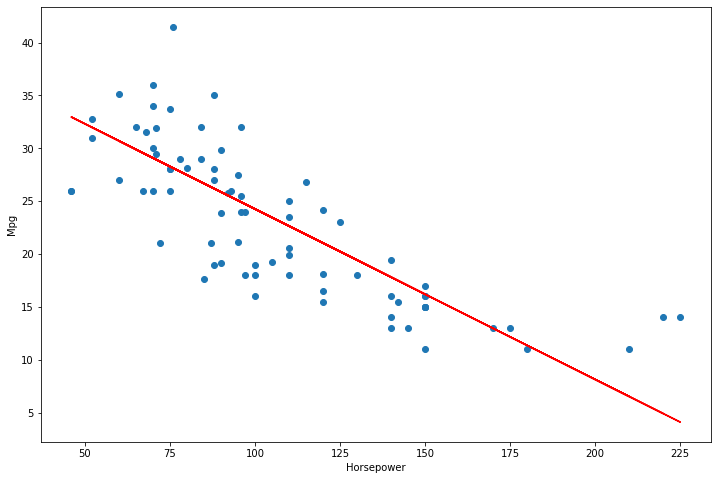

In [41]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Horsepower')
plt.ylabel('Mpg')
plt.show()